# Chapter 0: Beginning Python

**Prerequisite**: Any programming experience, with IDL or MATLAB for example. You should know what a loop is.

The true power of Python comes from numerous "packages" as reviewed in the [overview section](https://github.com/JiaweiZhuang/GEOSChem-python-tutorial#why-python). Two must-known packages are:
- `numpy` for numerical computation
- `matplotlib` for plotting

Their syntaxes are almost identical to MATLAB so are very easy to learn. Matplotlib is almost a clone of MATLAB plotting functions (**MAT**LAB-**plot**ting-**lib**rary)

To import packages, use the syntax ``import long_name as short_cut`` like below:


In [1]:
import matplotlib.pyplot as plt  # contains all plotting functions
import numpy as np  # contains all basic numerical operations

# The "inline" option shows figures inside this notebook, instead of in a standalone window
%matplotlib inline

# Built-in types vs Numpy arrays

In [2]:
1/2  # Of course, you can use Python as a calculator, like in any languages...

0.5

In [3]:
# In Jupyter environment, the last line in a cell will be printed by default, 
# so explicit print() statements like below are often not necessary
print('hello')  

hello


MATLAB users might want to make an "array" like below:

In [4]:
a = [1, 2, 4] # this is called a "list", not a numerical array!
type(a)

list

In [5]:
a[0]  # Python index starts with 0

1

But you've actually made a "list", which can contain anything:

In [6]:
# A list can contain anything, even another list!
a[0] = 'hello' 
a[2] = ['I am in a nested list'] # one-element list
a

['hello', 2, ['I am in a nested list']]

Lists are very versatile but are inefficent for heavy numerical computation.

What's equivalent to MATLAB/IDL's array type is `numpy.ndarray` ("nd" stands for "n-dimensional"):

In [7]:
b = np.array([1.0, 2, 4]) # This is a numerical array. Use 1.0 to convert integer to float
type(b)

numpy.ndarray

Unlike `list`, a numpy array does not allow mixed types, in most cases.

In [8]:
b[0] = 'hello' # not allowed

ValueError: could not convert string to float: 'hello'

Most operations on numpy arrays are automatically "broadcasted" over all elements, pretty much like MATLAB.

In [9]:
b + 1  # no need to write a "for" loop over elements

array([2., 3., 5.])

In [10]:
b * 2

array([2., 4., 8.])

The broadcasting rule in numpy is actually far more powerful than in MATLAB. It supports operations between high-dimensional arrays, often with different shapes. See [Computation on Arrays: Broadcasting](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) if you are interested.

# Plotting Numpy arrays with Matplotlib

In [11]:
x = np.arange(10)  # create a sequence; equivalent to [0:9] in MATLAB
y = np.sin(x)  # most mathematical functions like sin() and cos() live in the numpy module.
x, y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
        -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849]))

The plotting syntax is almost the same as MATLAB, except for the `plt` prefix:

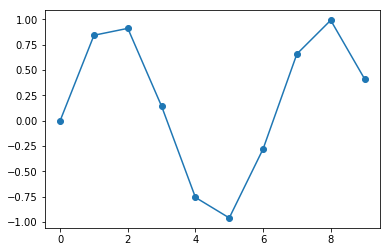

In [12]:
plt.plot(x, y, '-o')

Two equivalent ways of taking average:

In [13]:
np.mean(y)

0.195520948210738

In [14]:
# equivalent expression
# This is formally called "object oriented programming"
# Just think it as a short cut for now...
y.mean()

0.195520948210738

Then we overlay the average line on the data points, and tweak the axis and title.

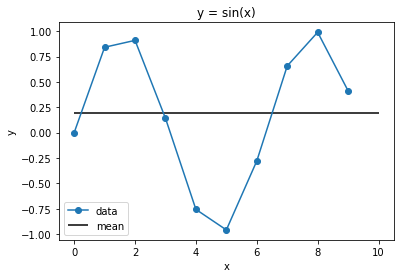

In [15]:
plt.plot(x, y, '-o', label='data')
plt.hlines(np.mean(y), 0, 10, label='mean')
plt.legend()  # display the "labels" specified in the above two lines

plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sin(x)')

# 2D array

Initialize an empty 2D array to play with:

In [16]:
z = np.zeros([4, 5])
z

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [17]:
z.ndim # the dimension is 2D

2

In [18]:
z.shape # the shape is 4x5

(4, 5)

You can definitely use "for" loops to modify the array...

In [19]:
# slow and cumbersome way
for i in range(4):
    for j in range(5):
        z[i, j] += 1
        
# Python uses line indentation to determine the end of the "for" loop,
# so there is no explicit "end" expression

z

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

But remember that all operations can be broadcasted...

In [20]:
# clever way
z += 2
z

array([[3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.]])

## Plot on 2D grid

In [21]:
A = np.arange(20).reshape(4, 5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

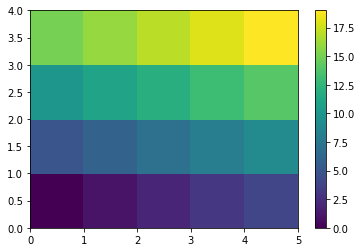

In [22]:
plt.pcolormesh(A) # same as MATLAB pcolormesh() function
plt.colorbar()

Assume that x and y axes are longitude and latitude. Let's add coordinate values.

In [23]:
lon_b = np.linspace(-120, 120, 6)  # same as MATLAB linspace()
lat_b = np.linspace(-60, 60, 5)

lon_b, lat_b 

(array([-120.,  -72.,  -24.,   24.,   72.,  120.]),
 array([-60., -30.,   0.,  30.,  60.]))

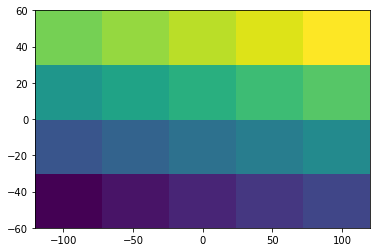

In [24]:
# pcolormesh expects the coordinate values to be cell boundaries (size N+1), not centers (size N)
plt.pcolormesh(lon_b, lat_b, A) 

# Fine-tuning the plot with "Axes" object

Matplotlib has [two types of interfaces](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html#Two-Interfaces-for-the-Price-of-One). The [MATLAB-like interface](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html#MATLAB-style-Interface) is convenient for quick plot, while the ["object oriented" interface](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html#Object-oriented-interface) can give you full control of the figure, which is especially useful for multi-panel plots.

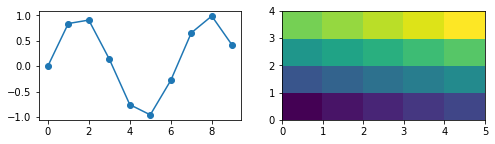

In [25]:
# use plt.subplots() to create a multi-panel layout.
# we also have a chance to specify the figure size here
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[8, 2])

# "fig" stands for the entire figure, while "axes" is a list containing 2 subplots

# Instead of calling plt.plot(), we call the plot method directly on each "axis".
# This is similar to the "object-oriented" expression, y.mean(), in the previous section
axes[0].plot(x, y, '-o') 
axes[1].pcolormesh(A)

We call each subplot a matplotlib "Axis":

In [26]:
type(axes[0])

matplotlib.axes._subplots.AxesSubplot

With direct access to each Axis, it is very easy to fine-tune each sub-panel. The [multi-panel plot in IDL](http://www.harrisgeospatial.com/docs/MultiViz.html) was a big pain for me, because swichting between panels was really cumbersome. I used to spend a long time fine-tuning IDL's graphics, just to make a well-looking plot for the paper. That was a huge waste of time and energy...

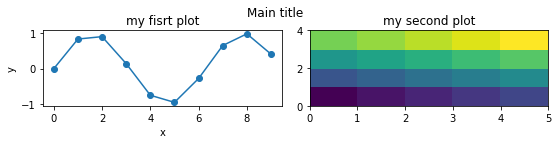

In [27]:
axes[0].set_title('my fisrt plot')
axes[1].set_title('my second plot')

axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

fig.suptitle('Main title')  # add a big title to the entire figure

fig.tight_layout() # make the overall layout cleaner
fig  # display the modified figure

# Plot on 2D geospatial map

[Cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html) is the recommened package for plotting on map. Existing Python users might know the old [Basemap](https://matplotlib.org/basemap/) package, but it is [deprecated in favor of Cartopy](https://matplotlib.org/basemap/users/intro.html#cartopy-new-management-and-eol-announcement).

In [28]:
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection

Cartopy has tons of [map projections](http://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html), but we stick to the simplest `PlateCarree` projection which is a flat map.

When using Cartopy, we often use matploltib's object-oriented interface to fine-tune the map, i.e. use `ax.plot()` rather than `plt.plot()`. 

Let's first make a empty map with no data:

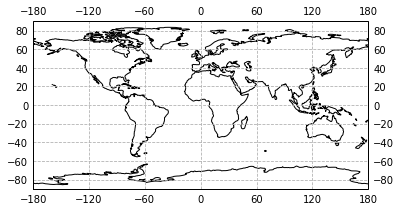

In [29]:
# We are not making subplots here, so just use `plt.axes()` to create one stand-alone axis (not a list of axes as plt.subplots() returns)
ax = plt.axes(projection=ccrs.PlateCarree())  # the "projection" keyword makes the axis aware of Earth geometry
ax.coastlines()  # overlay continents
ax.gridlines(draw_labels=True, linestyle='--')  # overlay gridlines

The axis object is a "Cartopy GeoAxes", which is like an enhanced version of "Matplotlib Axes".

In [30]:
type(ax)

cartopy.mpl.geoaxes.GeoAxesSubplot

Plotting our 2D data is as simple as calling `ax.pcolormesh()`:

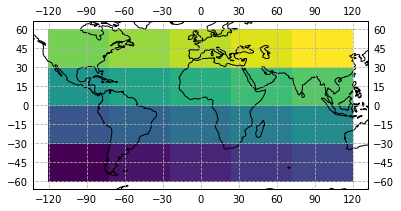

In [31]:
# == same as before ==
ax = plt.axes(projection=ccrs.PlateCarree())  # the projection keywords
ax.coastlines()  # overlay continents
ax.gridlines(draw_labels=True, linestyle='--')  # overlay gridlines

# == new code ==
im = ax.pcolormesh(lon_b, lat_b, A)

Finally, we do some minor fixes:
- Show the entire world by `ax.set_global()`.
- Add colorbar
- Save the figure a PNG file

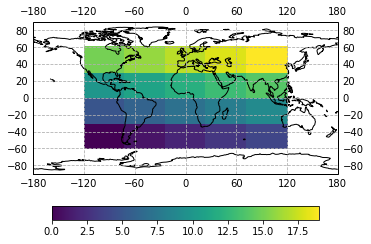

In [32]:
# == same as before ==
ax = plt.axes(projection=ccrs.PlateCarree())  # the projection keywords
ax.coastlines()  # overlay continents
ax.gridlines(draw_labels=True, linestyle='--')  # overlay gridlines
im = ax.pcolormesh(lon_b, lat_b, A)

# == new code ==
ax.set_global()
plt.colorbar(im, orientation='horizontal', shrink=0.8);
# Note that colorbar does not belong the axis, more like another subplot.
# So there is no "ax.colorbar()". We use "plt.colorbar()" instead.

plt.savefig('my-first-cartopy-plot.png', dpi=300) # Well, DPI 300 is ACP requirement...

A new file is created. We can use the shell command `ls` to check it. In Jupyter notebook，any code starting with the exclamation mark `!` will be executed as shell command.

In [33]:
!ls my-first-cartopy-plot.png

my-first-cartopy-plot.png


Go to the main notebook inferface (which shows all files in the directory), you should be able to view and download this file. The file transfer directly goes through the web browser (via HTTP). No need to use the `scp` command from the terminal.

Congrats! You now know enough Python, numpy, and matplotlib basics. 
You will learn how to open and analyze GEOS-Chem data in the next notebook: [Chapter01_explore_NetCDF_data.ipynb](./Chapter01_explore_NetCDF_data.ipynb)